<a href="https://colab.research.google.com/github/AEInha/Linear-Algebra/blob/main/soft_ware_labs/Midterm_2020a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm exam
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\Z}{\mathbf{Z}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This take-home exam contains two questions. _Your answers should be turned in to the instructor and the course assistant no later than 1:30pm on November 12th, and you are not allowed to discuss the exam with anyone until then._ The only exception is when you email the instructor for clarification.

Your answers should be as concise as possible while self-explaining that the presented results are reasonable. **_Poorly presented answers or list of graphs without any explanation, for which the graders have to closely examine or even run the code to check the correctness, will get no credit._** We suggest you spend at least an hour in carefully writing down concise explanations on your results.

Write your student ID and name below. **_Typing your name implies that you acknowledge and accept the Kyung Hee University Honor Code._**

<br>

- STUDENT ID:

- STUDENT NAME:

<br>

_Kyung Hee University Honor Code:_

1. The honor code is a commitment of students, individually and collectively, that they will not provide or receive any impermissible aid in examinations as well as other activities used as the basis of grading, and that they will do their best for the sake of the integrity of the community.
2. The faculty also assumes obligations to provide students with the environment in which students can best practice the honor code, and does its part in building the academic integrity of the community.

<br>

---
## Length of a parametric curve

The following parametric equations describe some flower-shaped curve in the complex plane, where $r$ and $\theta$ is the magnitude and the phase of the complex number at time $t$.

\begin{align*}
  r(\theta) &= 1 + \cos 5\theta
\end{align*}



<br>

_**(Problem 1a)**_ Draw the trajectory of the complex variables described by the above parametrization on the complex plane, for $0 \le \theta \lt 2\pi$.

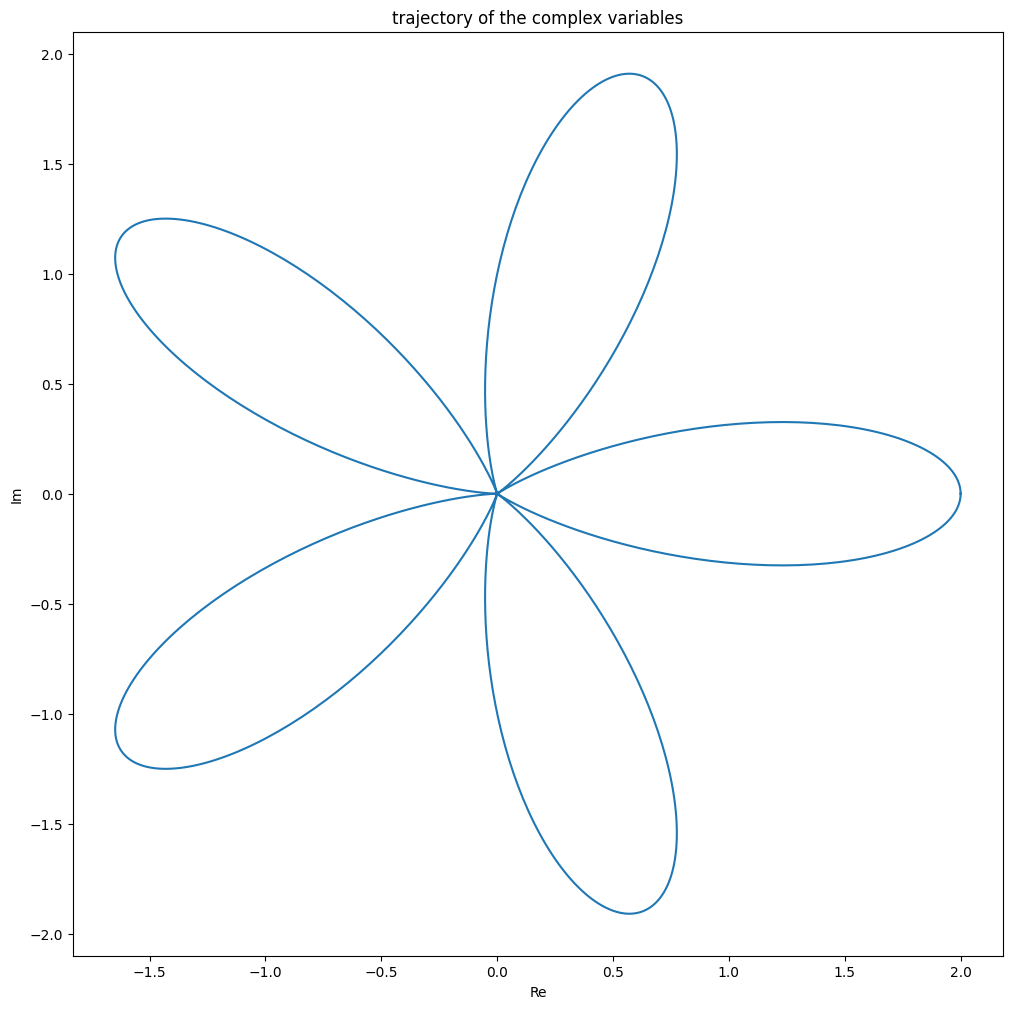

In [7]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
thetas = np.linspace(0,2*np.pi,1000)

r_thetas = 1 + np.cos(5*thetas)

x = r_thetas * np.cos(thetas)
y = r_thetas * np.sin(thetas)
plt.figure(figsize = (12,12))
plt.title("trajectory of the complex variables")
plt.plot(x,y)
plt.xlabel("Re")
plt.ylabel("Im")
plt.show()

<br>

_**(Problem 1b)**_ An infinitesimal arc length along the curve is given by:

$$
  dl = \sqrt{dr^2 + (rd\theta)^2}
$$

What is the total arc length, $L = \int {dl}$, obtained for $0 \le \theta \lt 2\pi$?

In [10]:
# your code here
import scipy.integrate as spi
from scipy.integrate import quad
def integrand(theta):
    return ((5*np.sin(5*theta))**2 + (1 + np.cos(5*theta))**2)**(1/2)


answer,error = quad(integrand, 0, 2*np.pi)
print("total arc length: ",answer)

total arc length:  21.871762620207154


<br>

---
## Near-Earth Objects

A near-Earth object (NEO) is any small Solar System body whose orbit brings it to proximity with Earth. By convention, a Solar System body is an NEO if its closest approach to the Sun (perihelion) is less than 1.3 astronomical units (AU). If an NEO's orbit crosses the Earth's, and the object is larger than 140 meters (460 ft) across, it is considered a potentially hazardous object (PHO). Most known PHOs and NEOs are asteroids, but a small fraction are comets.

Positions of NEOs can be described by the following differential equations in polar coordinates:

<br>

<center>
<img src="https://jonghank.github.io/ee370/files/polar_coord.png">
</center>

<br>

\begin{equation}
  \ddot{r} - r {\dot\theta}^2 = - \frac{\mu}{r^2}\\
  r \ddot{\theta} + 2 \dot{r}\dot{\theta} = 0
\end{equation}

<br>

where the range $r$ is the distance from the Sun, and the angle $\theta$ is measured from a reference line fixed in space, for example the direction to the Galactic center. We assume that the Sun is fixed in space and the motion of the NEOs are confined to a single orbital plane in which $r$ and $\theta$ are defined (and on which all planets in the solar system orbit).

<br>

<center>
<img src="https://jonghank.github.io/ee370/files/orbital_plane.jpg" width="800"
title="Image from National Geographic (https://media.nationalgeographic.org/assets/photos/000/285/28546.jpg)">
</center>

<br>

The normalized _gravitational coefficient_, $\mu$, appearing in the above dynamics is given as `mu` from below cell. The corresponding unit of $r$ is _AU_, which is roughly the distance from Earth to the Sun and equal to about 150 million kilometers, and the unit of the time is _day_. The unit of $\theta$ is _radian_ as usual.  

In [11]:
AU = 1.495978707e11           # AU in meters
DAY = 24*3600                 # day in seconds
GM_sun = 1.32712440018e20     # gravitational coefficient in m^3/s^2
mu = GM_sun*DAY**2/AU**3      # gravitational coefficient in AU^3/DAY^2

The following cell loads the current (November 10th, 2020) positions and the velocities, _i.e., $r$, $\dot{r}$, $\theta$, and $\dot\theta$_, of the 1000 NEOs in polar coordinates to the dataframe `NEO_current_states`. We are interested in finding the objects with the highest potential threat, among these 1000 NEOs. We assume that all these NEOs are similar in sizes, so what determines the level of threat is its closest approach to Earth.


In [12]:
import pandas as pd
NEO_current_states = pd.read_csv('https://jonghank.github.io/ee370/files/NEO_trajectories_data.csv', delimiter=',')

**In** addition, we assume that the current position and the velocity of the Earth (on November 10th, 2020) is as follows:

- $r_\text{E} = 1 $
- $\dot{r}_\text{E} = 0$
- $\theta_\text{E} = 0 $
- $\dot\theta_\text{E} = \sqrt{\mu} $

so the reference line, where $\theta=0$, is the direction (from the Sun) to which the Earth is located today.


<br>

_**(Problem 2a)**_ Plot the trajectories of the first[링크 텍스트](https://) 10 NEOs (in the database) and the Earth (and the Sun), simultaneously displaying (the pieces of) their elliptic orbits on a single plot. Present the three separate plots showing the trajectories (1) for the next year, (2) for the next 2 years, and (3) for the next 5 years.

In [93]:
display(NEO_current_states)

,Range (AU),Range rate (AU/day),Angle (rad),Angular rate (rad/day)
0,2.133308,0.003665,0.977053,-0.004586
1,1.908573,0.008889,1.160662,0.005912
2,2.113991,0.000057,2.656841,0.004874
3,1.781492,0.003859,2.450110,-0.004909
4,2.529540,-0.000231,1.692584,-0.003673
...,...,...,...,...
995,3.602814,0.000584,5.054014,-0.001917
996,2.591211,0.000574,1.929045,-0.003500
997,5.731768,0.001891,2.018961,0.000807
998,3.361846,-0.005061,3.355979,-0.002215


In [73]:
def normalize_angle(angle):
    return angle % (2 * np.pi)

# Apply normalization to the 'Angle (rad)' column
NEO_current_states['Angle (rad)'] = NEO_current_states['Angle (rad)'].apply(normalize_angle)


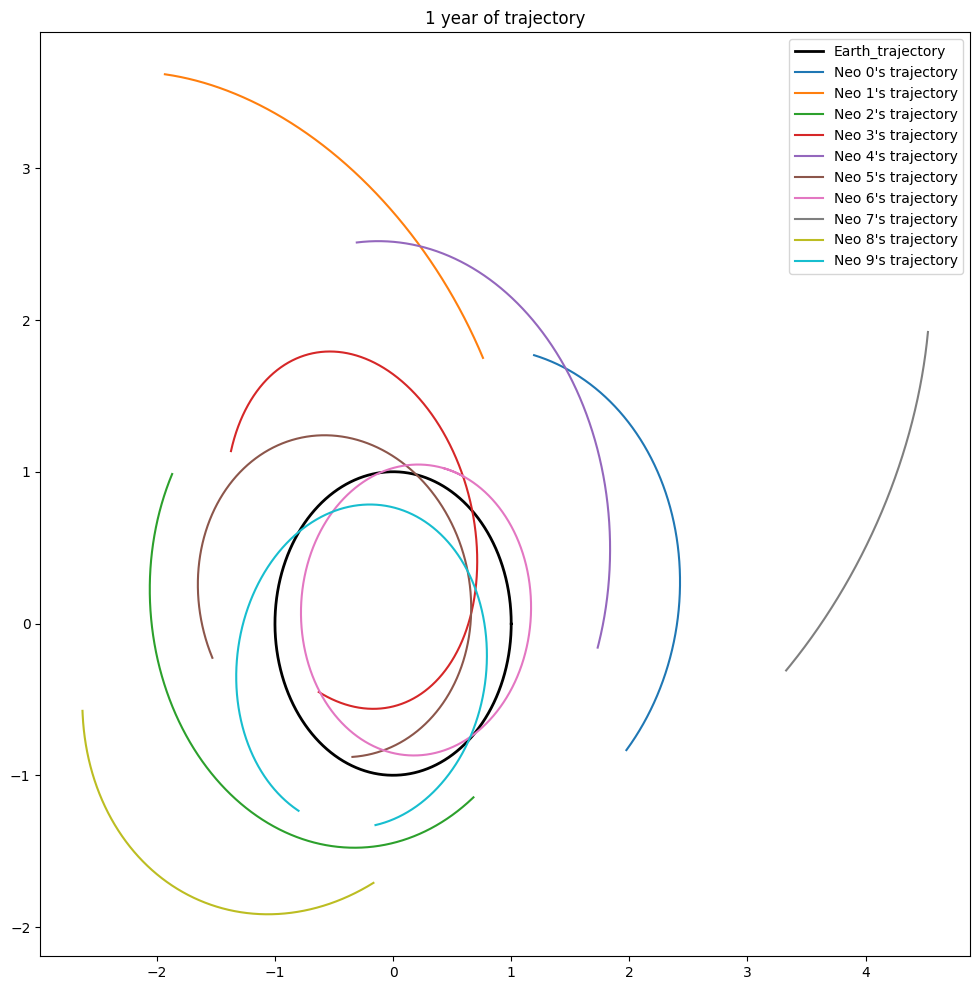

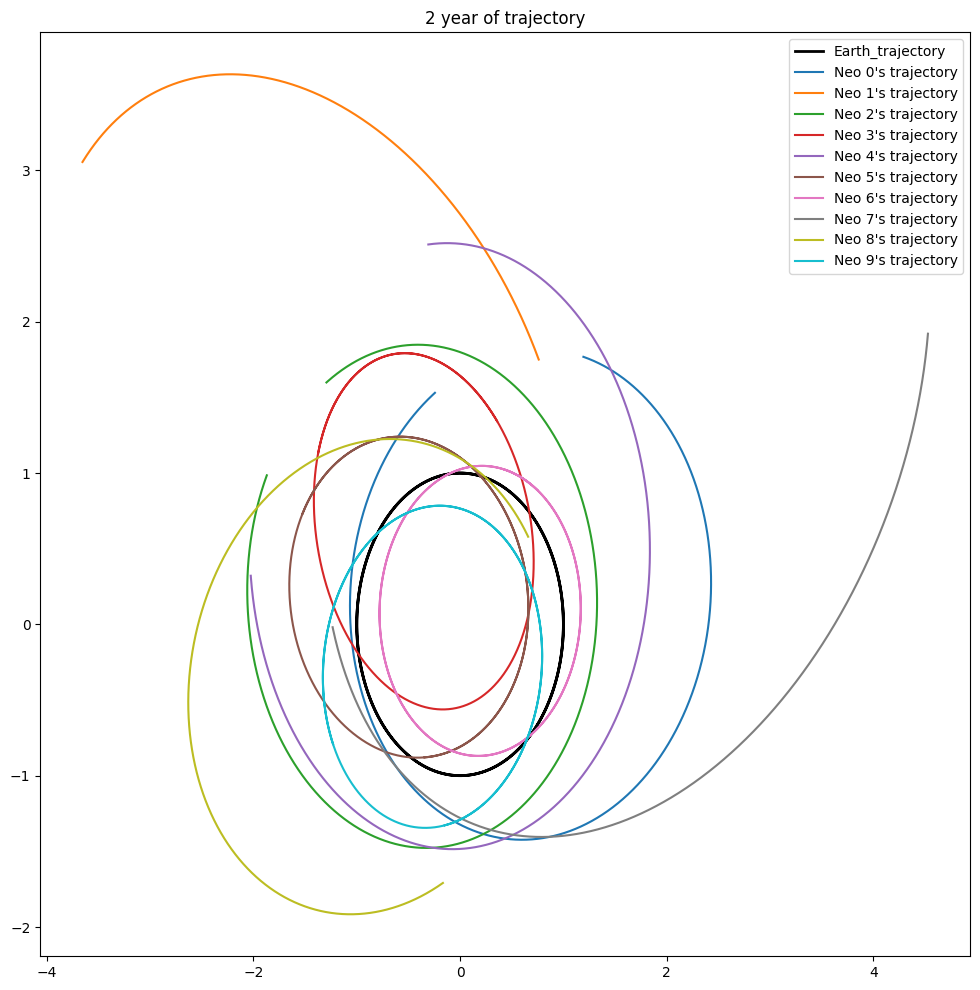

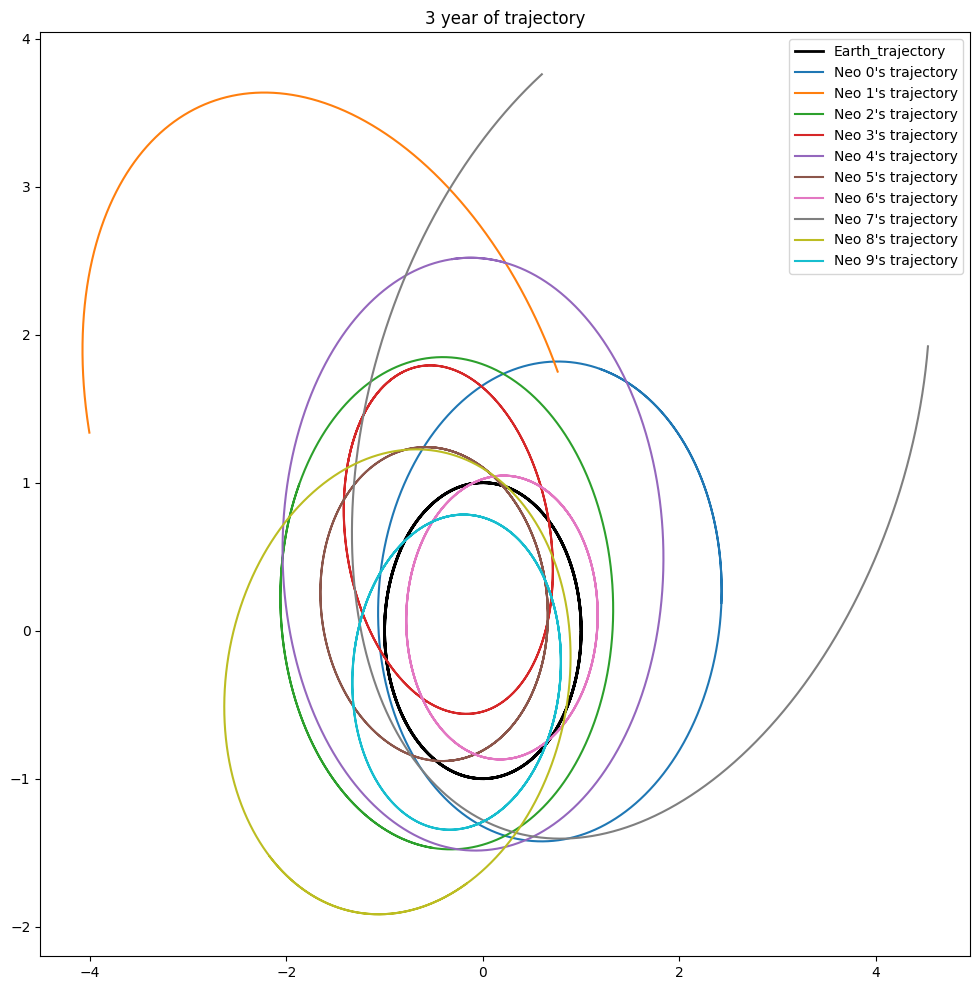

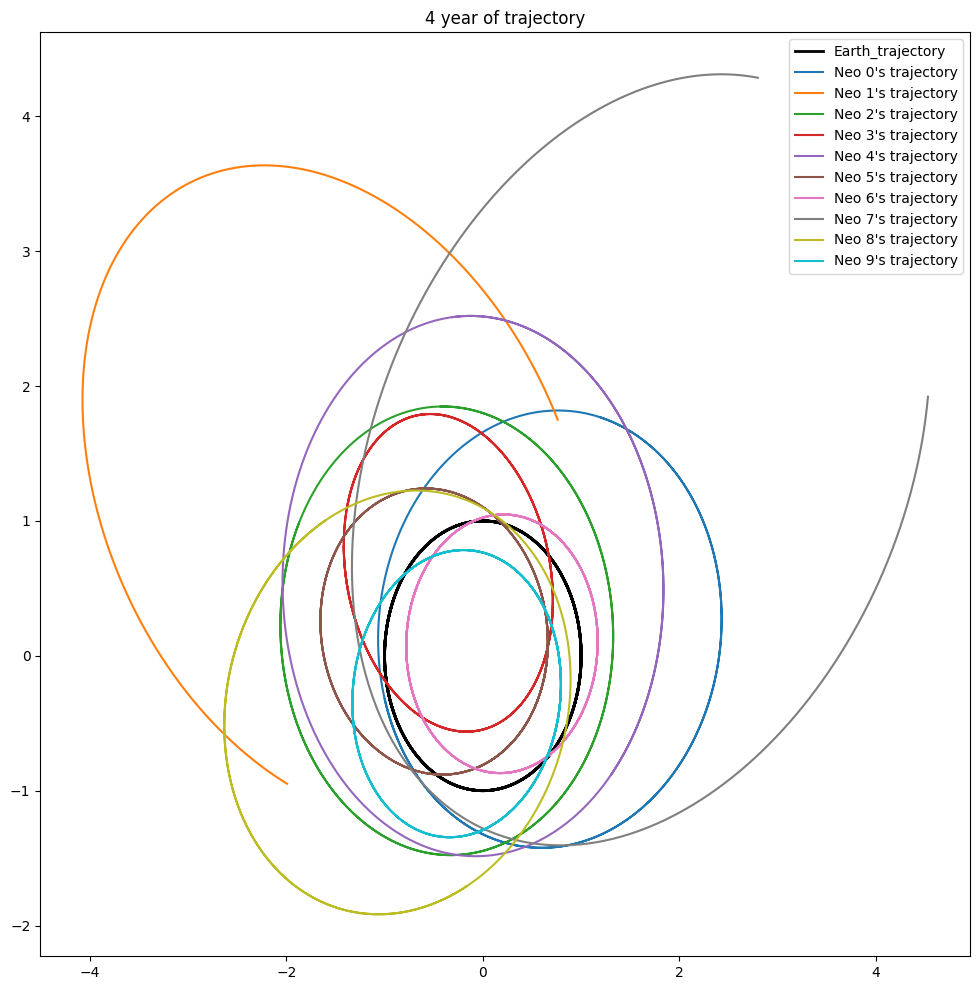

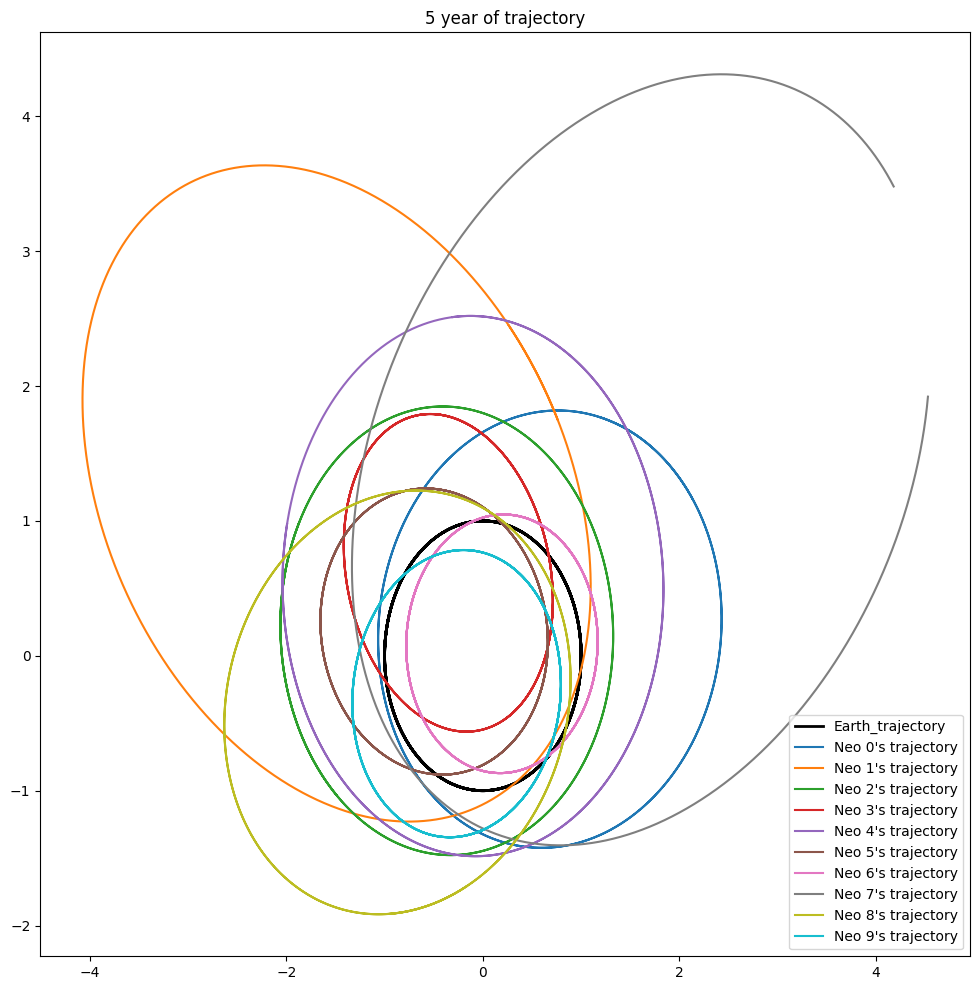

In [88]:
def trajectory(z,t,mu):
  r,theta,r_prime,theta_prime = z
  rdot = r_prime
  theta_dot = theta_prime
  r_two_dot =  r*(theta_prime)**2 - mu/r**2
  theta_two_dot = -2*r_prime*theta_prime/r
  return np.array([rdot,theta_dot,r_two_dot,theta_two_dot])

Neos_10 = NEO_current_states[0:10]
for i in range(1,6):
  t1 = np.linspace(0,i*365,10000)
  E_z = [1,0,0,np.sqrt(mu)]
  trj = spi.odeint(trajectory, E_z, t1,args=(mu,))
  r = trj[:,0]
  theta = trj[:,1]
  x_1 = r*np.cos(theta)
  y_1 = r*np.sin(theta)
  plt.figure(figsize=(12,12))
  plt.plot(x_1,y_1,'k',linewidth=2,label ="Earth_trajectory")

  for index, row in Neos_10.iterrows():
    z1 = np.array([row["Range (AU)"], row["Angle (rad)"], row["Range rate (AU/day)"], row["Angular rate (rad/day)"]])
    trj = spi.odeint(trajectory, z1, t1,args=(mu,))
    r = trj[:, 0]
    theta = trj[:, 1]
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    plt.plot(x,y,label=f"Neo {index}'s trajectory")

  plt.title(f"{i} year of trajectory")
  plt.legend()
  plt.show()

<br>

_**(Problem 2b)**_ Among the 1000 NEOs in your database, what are the five most hazardous NEOs that can approach the Earth closest in the next 30 years? What are they and when do you anticipate the closest approaches to occur. How close will they approach the Earth?

You will need to present the trajectories of the 1000 NEOs and Earth for the next 30 years, simultaneously displaying their elliptic orbits on a single plot.

In [113]:
# your code here
t1 = np.array([i for i in range(0,30*365)])
A = []
E_z = [1,0,0,np.sqrt(mu)]
e_trj = spi.odeint(trajectory, E_z, t1,args=(mu,))
e_x = e_trj[:,0] * np.cos(e_trj[:,1])
e_y = e_trj[:,0] * np.sin(e_trj[:,1])
min_error = 10000
min_trajectory = None
A = []
for index, row in NEO_current_states.iterrows():
  z1 = np.array([row["Range (AU)"], row["Angle (rad)"], row["Range rate (AU/day)"], row["Angular rate (rad/day)"]])
  trj = spi.odeint(trajectory, z1, t1,args=(mu,))
  r = trj[:, 0]
  theta = trj[:, 1]
  x = r*np.cos(theta)
  y = r*np.sin(theta)
  error_x = x - e_x
  error_y = y-e_y
  error = ((error_x)**2 +  (error_y)**2)**(1/2)
  ind = min_error_index = np.argmin(error)
  A.append([min(error),trj,ind])


print(sorted(A)[:5])

[[0.0005883785285618936, array([[ 8.82896600e-01,  3.44680100e+00,  3.84510600e-03,
        -1.95554100e-02],
       [ 8.86720520e-01,  3.42733003e+00,  3.80257890e-03,
        -1.93871097e-02],
       [ 8.90501409e-01,  3.40802545e+00,  3.75899052e-03,
        -1.92228333e-02],
       ...,
       [ 6.56081978e-01, -2.46323908e+02,  2.19988529e-03,
        -3.54117935e-02],
       [ 6.58348880e-01, -2.46359199e+02,  2.33329059e-03,
        -3.51683453e-02],
       [ 6.60747291e-01, -2.46394241e+02,  2.46287929e-03,
        -3.49134974e-02]]), 5271], [0.0012414292985405704, array([[ 1.90254300e+00,  8.03356700e-01,  1.75987700e-03,
         4.92484300e-03],
       [ 1.90428508e+00,  8.08277033e-01,  1.72428177e-03,
         4.91583635e-03],
       [ 1.90599157e+00,  8.13188462e-01,  1.68870932e-03,
         4.90703761e-03],
       ...,
       [ 1.82194964e+00,  1.20835609e+02, -2.98509783e-03,
         5.37093016e-03],
       [ 1.81894624e+00,  1.20840989e+02, -3.02170072e-03,
         

<br>

_**(Problem 2c)**_ Plot of the trajectories of the five most hazardous objects (for the next 30 years) and the Earth, marking the potential collision spots (of the five closest approaches).

What would the weather on the doomsday be like? Your guess should be entirely reasonable based on your simulation results.


5271
1988
2402
3514
6684


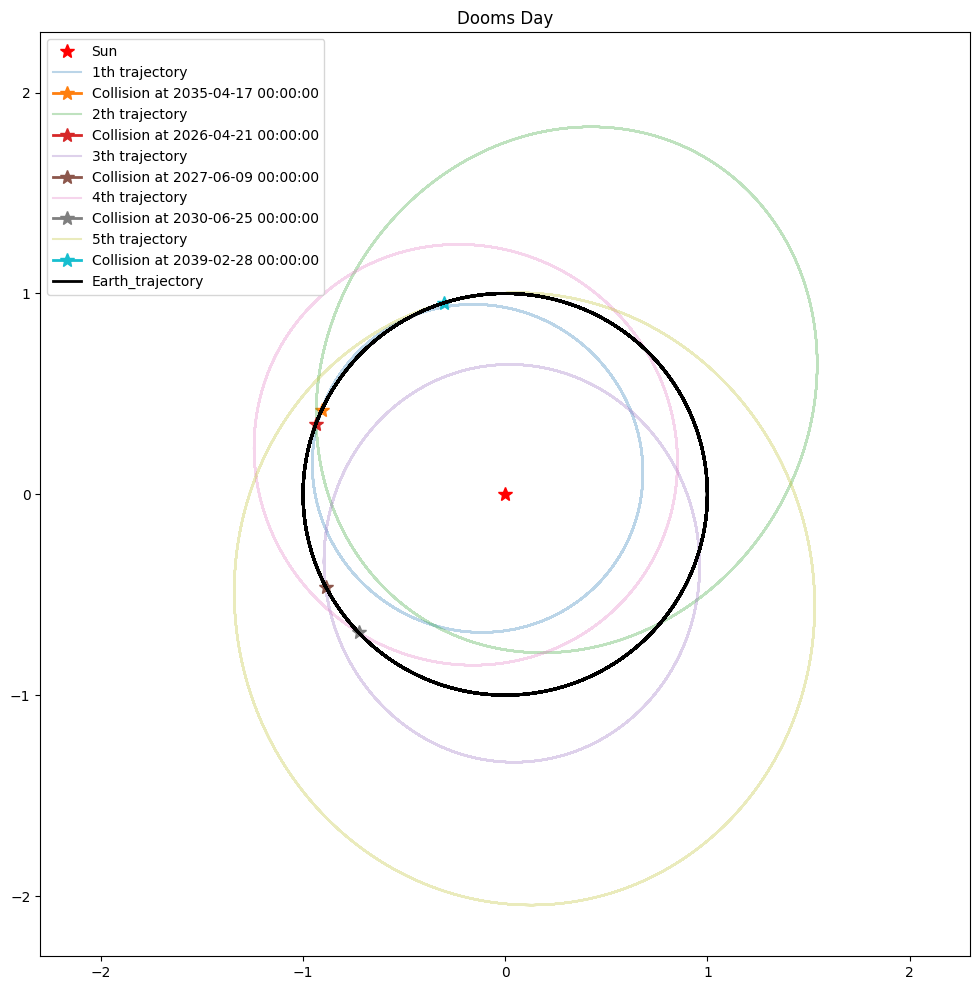

In [156]:
# your code here
from datetime import datetime, timedelta
base_date = datetime(2020, 11, 10)
plt.figure(dpi=100, figsize=(12,12))


plt.plot(0,0, 'r*', linewidth=2, label='Sun', markersize=10)

col = 1
for i in sorted(A)[:5]:
  print(i[2])

  trj = i[1]
  r = trj[:,0]
  theta = trj[:,1]
  x = r*np.cos(theta)
  y = r*np.sin(theta)
  plt.plot(x,y,alpha=0.3,label=f"{col}th trajectory")
  collision_date = base_date + timedelta(days=int(i[2]))
  plt.plot(x[i[2]],y[i[2]], marker='*', linewidth=2,label =f"Collision at {collision_date}",markersize=10)
  col +=1


plt.plot(e_x,e_y,'k',linewidth=2,label ="Earth_trajectory")
plt.xlim(-2.3,2.3)
plt.ylim(-2.3,2.3)
plt.legend()
plt.title("Dooms Day")
plt.show()

In [145]:
L = sorted(A)[:5]
day = 100000000
print("days",L[0][2]%365)

days 161
